In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## LOADING DATA COLLECTED FROM NSE WEBSITE

In [2]:
df = pd.read_csv('nseindex.csv')
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,01-Jan-09,2963.30,3039.25,2963.30,3033.45,226681072,4302.54
1,02-Jan-09,3034.60,3079.85,3021.80,3046.75,318672508,6132.72
2,05-Jan-09,3058.75,3131.95,3056.45,3121.45,311929372,6737.94
3,06-Jan-09,3121.50,3141.80,3056.10,3112.80,340452916,8091.74
4,07-Jan-09,3112.80,3147.20,2888.20,2920.40,686898999,10865.55


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 7 columns):
Date                 3008 non-null object
Open                 3008 non-null float64
High                 3008 non-null float64
Low                  3008 non-null float64
Close                3008 non-null float64
Shares Traded        3008 non-null int64
Turnover (Rs. Cr)    3008 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 164.6+ KB


In [4]:
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,2009-01-01,2963.30,3039.25,2963.30,3033.45,226681072,4302.54
1,2009-01-02,3034.60,3079.85,3021.80,3046.75,318672508,6132.72
2,2009-01-05,3058.75,3131.95,3056.45,3121.45,311929372,6737.94
3,2009-01-06,3121.50,3141.80,3056.10,3112.80,340452916,8091.74
4,2009-01-07,3112.80,3147.20,2888.20,2920.40,686898999,10865.55


In [5]:
df.shape

(3008, 7)

In [6]:
df['Year'] = df['Date'].apply(lambda x:x.year)
final_df = df[df['Year'] < 2019]
final_df

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Year
0,2009-01-01,2963.30,3039.25,2963.30,3033.45,226681072,4302.54,2009
1,2009-01-02,3034.60,3079.85,3021.80,3046.75,318672508,6132.72,2009
2,2009-01-05,3058.75,3131.95,3056.45,3121.45,311929372,6737.94,2009
3,2009-01-06,3121.50,3141.80,3056.10,3112.80,340452916,8091.74,2009
4,2009-01-07,3112.80,3147.20,2888.20,2920.40,686898999,10865.55,2009
...,...,...,...,...,...,...,...,...
2466,2018-12-21,10944.25,10963.65,10738.65,10754.00,389235107,18663.85,2018
2467,2018-12-24,10780.90,10782.30,10649.25,10663.50,230291344,10695.60,2018
2468,2018-12-26,10635.45,10747.50,10534.55,10729.85,271942701,12831.99,2018
2469,2018-12-27,10817.90,10834.20,10764.45,10779.80,470160392,19119.88,2018


In [7]:
final_df.isnull().sum()

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Shares Traded        0
Turnover (Rs. Cr)    0
Year                 0
dtype: int64

The above data is ready to use as it contains no null values and this data is splitted in 2 parts for training and testing purpose.

In [8]:
train_df = final_df[final_df.Year<2018]
test_df = final_df[final_df.Year>2017]

### TEST DATA (2018-2019)

In [9]:
test_df

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Year
2226,2018-01-01,10531.70,10537.85,10423.10,10435.55,134532090,7546.56,2018
2227,2018-01-02,10477.55,10495.20,10404.65,10442.20,158092430,8665.47,2018
2228,2018-01-03,10482.65,10503.60,10429.55,10443.20,172516859,9541.60,2018
2229,2018-01-04,10469.40,10513.00,10441.45,10504.80,180257392,9561.95,2018
2230,2018-01-05,10534.25,10566.10,10520.10,10558.85,186469717,10306.22,2018
...,...,...,...,...,...,...,...,...
2466,2018-12-21,10944.25,10963.65,10738.65,10754.00,389235107,18663.85,2018
2467,2018-12-24,10780.90,10782.30,10649.25,10663.50,230291344,10695.60,2018
2468,2018-12-26,10635.45,10747.50,10534.55,10729.85,271942701,12831.99,2018
2469,2018-12-27,10817.90,10834.20,10764.45,10779.80,470160392,19119.88,2018


### TRAIN DATA (2009-2017)

In [10]:
train_df

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Year
0,2009-01-01,2963.30,3039.25,2963.30,3033.45,226681072,4302.54,2009
1,2009-01-02,3034.60,3079.85,3021.80,3046.75,318672508,6132.72,2009
2,2009-01-05,3058.75,3131.95,3056.45,3121.45,311929372,6737.94,2009
3,2009-01-06,3121.50,3141.80,3056.10,3112.80,340452916,8091.74,2009
4,2009-01-07,3112.80,3147.20,2888.20,2920.40,686898999,10865.55,2009
...,...,...,...,...,...,...,...,...
2221,2017-12-22,10457.30,10501.10,10448.25,10493.00,143119167,8755.32,2017
2222,2017-12-26,10512.30,10545.45,10477.95,10531.50,160417384,9043.77,2017
2223,2017-12-27,10531.05,10552.40,10469.25,10490.75,170307122,9077.60,2017
2224,2017-12-28,10498.20,10534.55,10460.45,10477.90,281309989,14551.58,2017


## Plotting the train data

C:\Users\hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


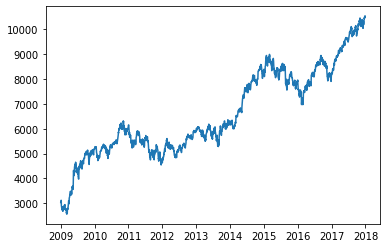

In [11]:
plt.plot(train_df['Date'],train_df['Close'])

#### According to the stock market the price generally increases in the long term , thats what our visualization shows. Hence linear model would fit perfectly with our data.

KEEPING ONY FEATURES THAT ARE USED IN TRAINING THE MODEL (OPEN ,HIGH,LOW AND VOLUME)

In [12]:
x_train = train_df.drop(['Date','Year','Close','Turnover (Rs. Cr)'],axis=1)
y_train = train_df['Close']
x_train

,Open,High,Low,Shares Traded
0,2963.30,3039.25,2963.30,226681072
1,3034.60,3079.85,3021.80,318672508
2,3058.75,3131.95,3056.45,311929372
3,3121.50,3141.80,3056.10,340452916
4,3112.80,3147.20,2888.20,686898999
...,...,...,...,...
2221,10457.30,10501.10,10448.25,143119167
2222,10512.30,10545.45,10477.95,160417384
2223,10531.05,10552.40,10469.25,170307122
2224,10498.20,10534.55,10460.45,281309989


In [13]:
y_train

0        3033.45
1        3046.75
2        3121.45
3        3112.80
4        2920.40
          ...   
2221    10493.00
2222    10531.50
2223    10490.75
2224    10477.90
2225    10530.70
Name: Close, Length: 2226, dtype: float64

TRAINING MODEL USING **RIDGE REGRESSION**

In [14]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit(x_train,y_train)
reg.coef_



array([-5.75249022e-01,  9.22610462e-01,  6.53069191e-01, -2.66279068e-08])

In [15]:
reg.intercept_


-6.404261749787111

## PREPARING THE  DATASET

In [16]:
x_test = test_df.drop(['Date','Year','Close','Turnover (Rs. Cr)'],axis=1)
y_test = test_df[['Date','Close']]

PREDICTING THE CLOSING VALUES USING TEST DATASET

In [17]:
pred = reg.predict(x_test)
sub_df = pd.DataFrame(pred,index=test_df['Date'],columns=['Close'])
sub_df['Year'] = sub_df.index.year
sub_df

,Close,Year
Date,,
2018-01-01,10460.999447,2018
2018-01-02,10440.123357,2018
2018-01-03,10460.816845,2018
2018-01-04,10484.676842,2018
2018-01-05,10547.561029,2018
...,...,...
2018-12-21,10815.821773,2018
2018-12-24,10688.321247,2018
2018-12-26,10663.868249,2018


In [18]:
x1 = sub_df[sub_df['Year']==2018]['Close']
x1  #predicted

Date
2018-01-01    10460.999447
2018-01-02    10440.123357
2018-01-03    10460.816845
2018-01-04    10484.676842
2018-01-05    10547.561029
                  ...     
2018-12-21    10815.821773
2018-12-24    10688.321247
2018-12-26    10663.868249
2018-12-27    10783.766877
2018-12-28    10877.012398
Name: Close, Length: 245, dtype: float64

In [19]:
y_test['Year'] = y_test['Date'].apply(lambda x:x.year)
y_test

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Close,Year
2226,2018-01-01,10435.55,2018
2227,2018-01-02,10442.20,2018
2228,2018-01-03,10443.20,2018
2229,2018-01-04,10504.80,2018
2230,2018-01-05,10558.85,2018
...,...,...,...
2466,2018-12-21,10754.00,2018
2467,2018-12-24,10663.50,2018
2468,2018-12-26,10729.85,2018
2469,2018-12-27,10779.80,2018


In [20]:
y_test.set_index('Date',inplace=True)
x2=y_test[y_test['Year']==2018]['Close']
x2

Date
2018-01-01    10435.55
2018-01-02    10442.20
2018-01-03    10443.20
2018-01-04    10504.80
2018-01-05    10558.85
                ...   
2018-12-21    10754.00
2018-12-24    10663.50
2018-12-26    10729.85
2018-12-27    10779.80
2018-12-28    10859.90
Name: Close, Length: 245, dtype: float64

In [21]:
x1


Date
2018-01-01    10460.999447
2018-01-02    10440.123357
2018-01-03    10460.816845
2018-01-04    10484.676842
2018-01-05    10547.561029
                  ...     
2018-12-21    10815.821773
2018-12-24    10688.321247
2018-12-26    10663.868249
2018-12-27    10783.766877
2018-12-28    10877.012398
Name: Close, Length: 245, dtype: float64

PLOTTING REAL VALUES(X2) AND PREDICTED VALUES (X1) 

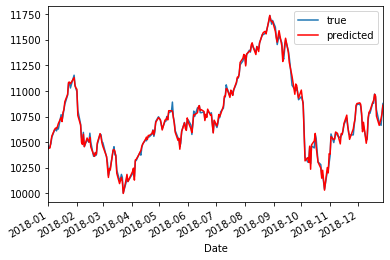

In [22]:
x1.plot(kind='line')
ax = plt.gca()
ax.plot(x2,'r-')
ax.legend(['true','predicted']) #x1=predicted x2=true;

In [23]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(x2, x1))

720.9475189418389


From the figure and the obtained MSE we can see that the model performs well in predicting the closing prices.
The model alse performs well when volume of shares traded is not considered as a feature.